<a href="https://colab.research.google.com/github/Antoneva98/portfolio/blob/main/Sales_Insights_Dashboard_with_Matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import  matplotlib.pyplot as plt

In [ ]:
# Connecting Google Drive
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Example of changing work folder
%cd /content/drive/MyDrive/colab_projects

/content/drive/MyDrive/colab_projects


In [ ]:
# import CSV file
df_sales = pd.read_csv("sales_data_updated.csv")
df_sales.head()

,order_date,time,aging,customer_id,gender,device_type,customer_login_type,product_category,product,sales,quantity,discount,profit,shipping_cost,order_priority,payment_method
0,2018-01-01,10:11:40,5.0,29317,Male,Web,Member,Auto & Accessories,Car Media Players,140.0,4.0,0.3,43.2,4.3,Medium,e_wallet
1,2018-01-01,22:30:44,7.0,42270,Male,Web,Member,Auto & Accessories,Car Pillow & Neck Rest,231.0,5.0,0.1,139.5,13.9,High,money_order
2,2018-01-01,21:55:31,10.0,14563,Male,Web,Member,Auto & Accessories,Car Speakers,211.0,5.0,0.1,120.5,12.0,High,credit_card
3,2018-01-01,13:57:15,9.0,58601,Male,Web,Member,Auto & Accessories,Tyre,250.0,4.0,0.2,150.0,15.0,Critical,credit_card
4,2018-01-01,15:17:41,2.0,48342,Male,Web,Member,Auto & Accessories,Tyre,250.0,1.0,0.1,165.0,16.5,High,credit_card


In [ ]:
#change type for date and time to datetime
df_sales["order_date"] = pd.to_datetime(df_sales["order_date"])
df_sales["time"] = pd.to_datetime(df_sales["time"], format="%H:%M:%S")

In [ ]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   order_date           51290 non-null  datetime64[ns]
 1   time                 51290 non-null  datetime64[ns]
 2   aging                51289 non-null  float64       
 3   customer_id          51290 non-null  int64         
 4   gender               51290 non-null  object        
 5   device_type          51290 non-null  object        
 6   customer_login_type  51290 non-null  object        
 7   product_category     51290 non-null  object        
 8   product              51290 non-null  object        
 9   sales                51289 non-null  float64       
 10  quantity             51288 non-null  float64       
 11  discount             51289 non-null  float64       
 12  profit               51290 non-null  float64       
 13  shipping_cost        51289 non-

In [ ]:
unique_categories = df_sales['product_category'].unique()
print(unique_categories)

['Auto & Accessories' 'Fashion' 'Electronic' 'Home & Furniture']


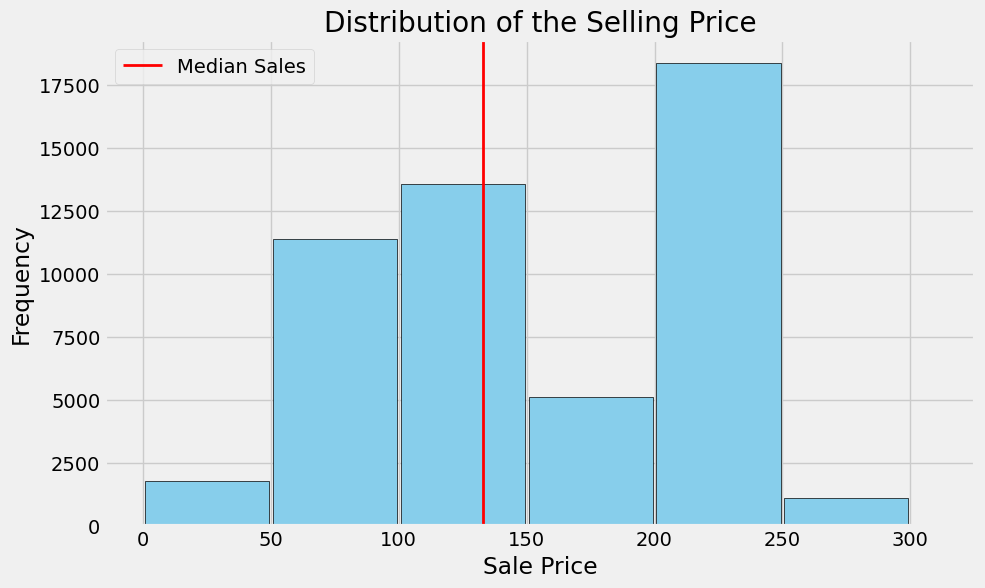

In [ ]:
plt.figure(figsize=(10, 6))
plt.style.use("fivethirtyeight")

plt.hist(df_sales["sales"], bins=[0, 50, 100, 150, 200, 250, 300, 310], rwidth=0.97, color="skyblue", edgecolor="black")
plt.title("Distribution of the Selling Price")

plt.axvline(x=df_sales['sales'].median(), linewidth=2, color='Red', label="Median Sales")

plt.xlabel("Sale Price")
plt.ylabel("Frequency")
plt.legend()

plt.show()

Найчастіше зустрічаються продажі між 200 і 250
Найшірші продажі починаються між 250 та 300

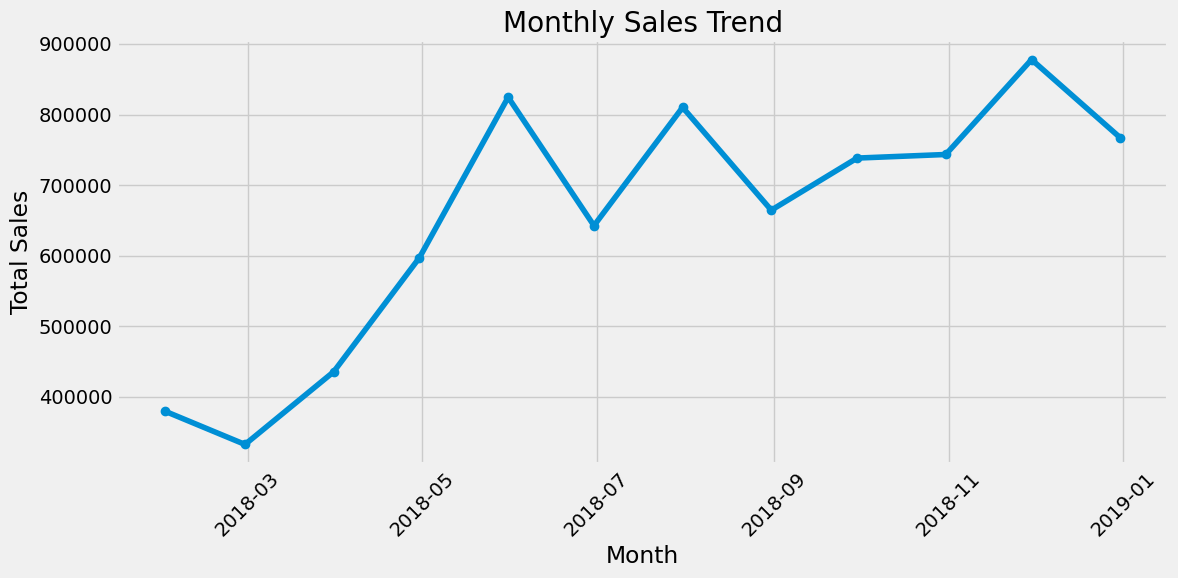

In [ ]:
# 2
order_date = df_sales['order_date']
sales = df_sales['sales']

monthly_sales = df_sales.groupby(pd.Grouper(key='order_date', freq='ME'))['sales'].sum()


plt.figure(figsize=(12, 6))
plt.style.use("fivethirtyeight")

plt.plot(monthly_sales.index, monthly_sales.values, marker='o', linestyle='-')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

За тенденцією кількість продажів росла у період з 03.2018 по 06.2018, після чого відбувалася циклічність. Пік продажі припав на 12.2018, що можливо, пов`язаний зі святами. Після 12.2018 продажі знову почали падати

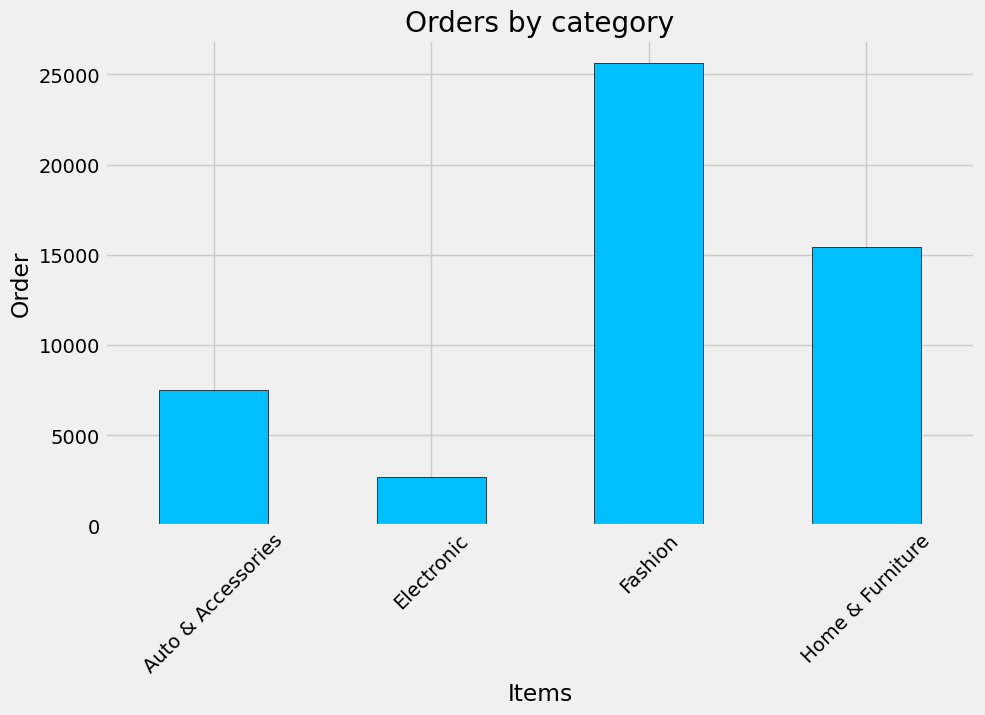

In [ ]:
# 3
plt.figure(figsize=(10, 6))
plt.style.use("fivethirtyeight")

category_counts = df_sales.groupby('product_category')['order_date'].count()

category_counts.plot(kind='bar', color='deepskyblue', edgecolor='black')
plt.title('Orders by category')
plt.xlabel('Items')
plt.ylabel('Order')
plt.xticks(rotation=45)
plt.show()

Найбільш популярною категорією являється Fashion. Відповідно найменш популярною - Electronic

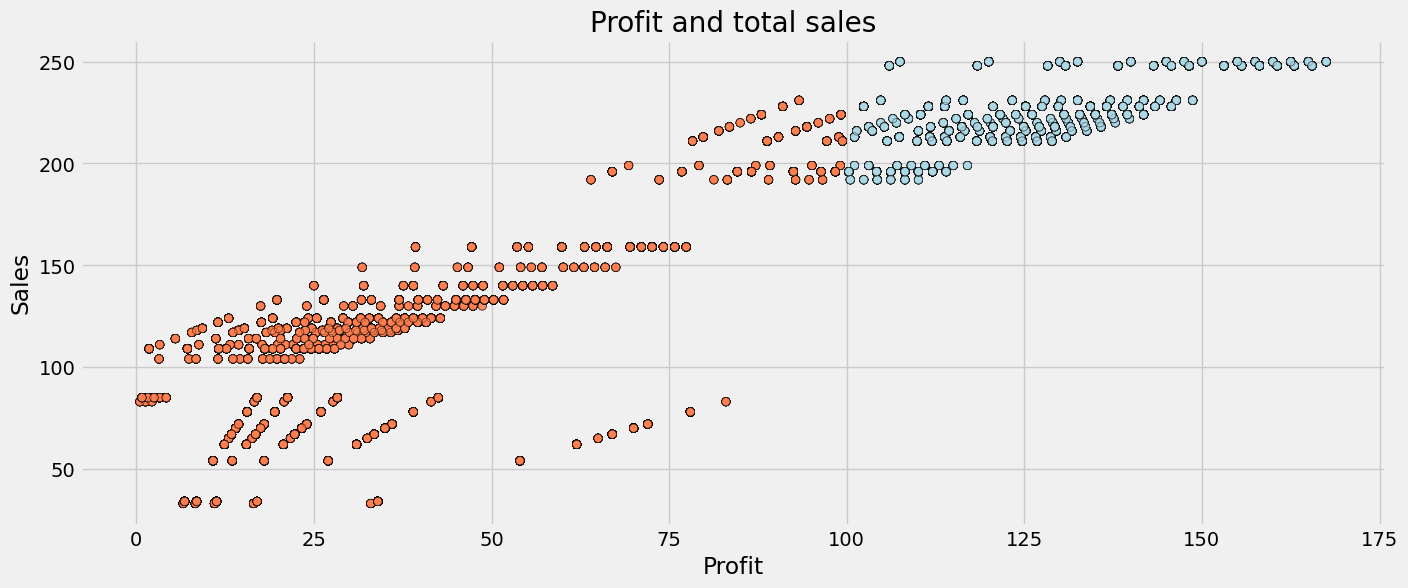

In [ ]:
# 4
profit = df_sales['profit']
sales = df_sales['sales']

colors = ['lightblue' if x > 100 else 'coral' for x in profit]

plt.figure(figsize=(15, 6))
plt.style.use("fivethirtyeight")

plt.scatter(profit, sales, color=colors, edgecolor='black', alpha=0.6)
plt.title("Profit and total sales")
plt.xlabel("Profit")
plt.ylabel("Sales")
plt.show()

Візуально спостерігається позитивний зв'язок між прибутком та загальним обсягом продажів. Це означає, що в цілому, чим вищий обсяг продажів, тим вищий і прибуток  

При низьких значеннях прибутку спостерігається широкий діапазон значень продажів, зокрема і досить низькі. Зі зростанням прибутку, мінімальний рівень продажів також зростає.  

У центральній області спостерігається розрив


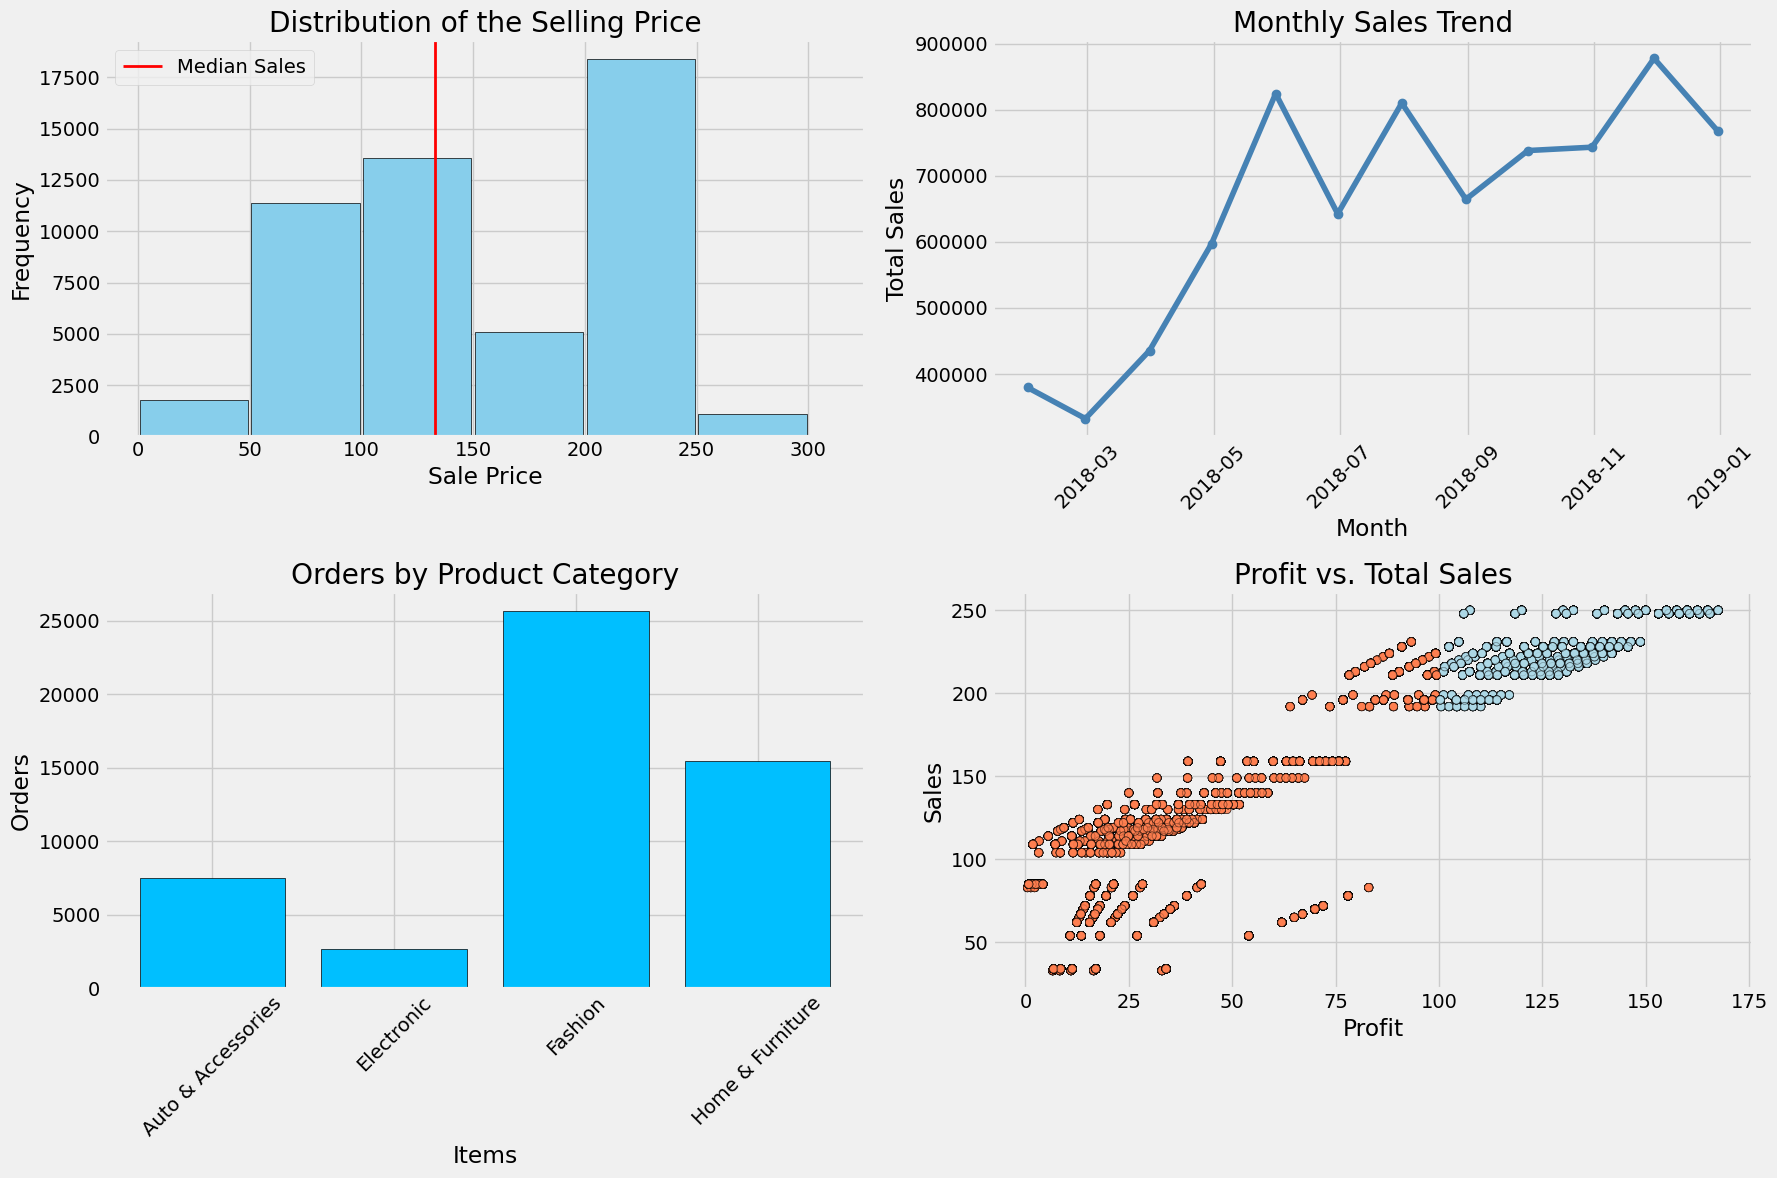

In [ ]:
# 5

profit = df_sales['profit']
sales = df_sales['sales']
order_date = df_sales['order_date']
monthly_sales = df_sales.groupby(pd.Grouper(key='order_date', freq='ME'))['sales'].sum()
category_counts = df_sales.groupby('product_category')['order_date'].count()
colors = ['lightblue' if x > 100 else 'coral' for x in profit]

fig, axs = plt.subplots(2, 2, figsize=(18, 12))
plt.style.use("fivethirtyeight")

# Histogram of Sales
axs[0, 0].hist(df_sales["sales"], bins=[0, 50, 100, 150, 200, 250, 300, 310],
               rwidth=0.97, color="skyblue", edgecolor="black")
axs[0, 0].axvline(x=df_sales['sales'].median(), linewidth=2, color='Red', label="Median Sales")
axs[0, 0].set_title("Distribution of the Selling Price")
axs[0, 0].set_xlabel("Sale Price")
axs[0, 0].set_ylabel("Frequency")
axs[0, 0].legend()

# Monthly Sales Trend
axs[0, 1].plot(monthly_sales.index, monthly_sales.values, marker='o', linestyle='-', color='steelblue')
axs[0, 1].set_title("Monthly Sales Trend")
axs[0, 1].set_xlabel("Month")
axs[0, 1].set_ylabel("Total Sales")
axs[0, 1].tick_params(axis='x', rotation=45)
axs[0, 1].grid(True)

# Orders by Category
axs[1, 0].bar(category_counts.index, category_counts.values, color='deepskyblue', edgecolor='black')
axs[1, 0].set_title('Orders by Product Category')
axs[1, 0].set_xlabel('Items')
axs[1, 0].set_ylabel('Orders')
axs[1, 0].tick_params(axis='x', rotation=45)

# Profit vs Sales Scatter Plot
axs[1, 1].scatter(profit, sales, color=colors, edgecolor='black', alpha=0.6)
axs[1, 1].set_title("Profit vs. Total Sales")
axs[1, 1].set_xlabel("Profit")
axs[1, 1].set_ylabel("Sales")

plt.tight_layout()
plt.show()

1. Побудуй гістограму для візуалізації розподілу ціни продажу (sales).   
* Проаналізуй, які продажі зустрічаються найчастіше, який характер розподілу значень загалом.

2. Створи лінійний графік, який показує зміну продажів (sales) у часі (order_date). Перед цим потрібно переконатись у тому, що стовпчик order_date має відповідний тип даних. Це допоможе зрозуміти тенденцію покупок протягом зазначеного періоду. Якою є ця тенденція згідно з графіком?

3. Побудуй стовпчастий графік, що показує кількість замовлень за категоріями товарів (product_category). Використовуй групування даних. Яка категорія найбільш популярна? Яка найменш популярна?

4. Створи діаграму розсіювання для візуалізації взаємозв'язку між прибутком (profit) та загальною сумою продажу (sales). Подумай, чи є зв'язок між цими показниками і який характер цього взаємозв'язку.

5. Створи масив графіків (2x2) з попередніх візуалізацій, щоб на одному малюнку побачити всі графіки та порівняти їх.